In [3]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [4]:
# wielokat na wejsciu jest podany w postaci listy wierzcholkow zgodnie z ruchem wskazowek zegara, poczynając od lewej

def przygotuj(wielokat):
    indeks = 0
    maks = wielokat[0][0]
    for i in range(1,len(wielokat)):
        if wielokat[i][0] > maks:
            maks = wielokat[i][0]
            indeks = i

    wielokat_flag = []
    for i in range(0, len(wielokat)):
        if i <= indeks:
            wielokat_flag.append([wielokat[i], 1])
        else: wielokat_flag.append([wielokat[i], -1])
    return sorted(wielokat_flag, key=lambda x: x[0])

In [5]:
class Stos: 
    def __init__ (self):
        self.Stos = []
    def wloz(self, s):
        self.Stos.append(s)   
    def zdejmij(self):
        if not Stos.czy_pusty(self):
            self.Stos.pop(-1) 
    def rozmiar(self):
        return len(self.Stos)
    def top(self):
        return self.Stos[-1]
    def czy_pusty(self):
        return len(self.Stos) == 0
    def zawartość(self): # do debuggowania
        return self.Stos

In [6]:
def skret_w_prawo(lancuch, p1, p2, p3):
    if lancuch == -1: return (p3[0] - p1[0])*(p2[1] - p1[1]) > (p2[0] - p1[0])*(p3[1] - p1[1])
    if lancuch == 1: return (p1[0] - p3[0])*(p2[1] - p3[1]) > (p2[0] - p3[0])*(p1[1] - p3[1])

def triangulacja(wielokat):
    stos = Stos()
    stos.wloz(wielokat[0])
    stos.wloz(wielokat[1])
    przekatne = []
    
    for i in range (2, len(wielokat)-1):
        print("stos:", stos.zawartość())
        print("wierzcholek: ", wielokat[i][0])

        last_top = stos.top()
        # inny lancuch - doczepiamy przekatne do wszystkich ze stosu
        if last_top[1] != wielokat[i][1]:
            # print("inny lancuch")
            for j in range (0, stos.rozmiar()-1):
                przekatne.append((wielokat[i][0], stos.top()[0]))
                print("dodaję: ", przekatne[-1])
                last_top = stos.top()
                stos.zdejmij()
            stos.zdejmij()
            lancuch = last_top[1]
            stos.wloz(last_top)
            stos.wloz(wielokat[i])
            print()
        # ten sam lancuch
        else:
            # print("ten sam lancuch")
            last_top = None
            vk = stos.top()
            stos.zdejmij()
            # poki to mozliwe, dodajemy przekatne do wierzcholkow ze stosu
            while stos.rozmiar() > 0 and skret_w_prawo(vk[1], wielokat[i][0], vk[0], stos.top()[0]):
                # print("skret w prawo")
                przekatne.append((wielokat[i][0], stos.top()[0]))
                print("dodaję: ",przekatne[-1])
                vk = stos.top()
                stos.zdejmij()
            stos.wloz(vk)
            stos.wloz(wielokat[i])
            last_top = vk if last_top is None else last_top
            print()
        
    # ostatni wierzcholek laczymy ze wszystkimi ze stosu poza pierwszym i ostatnim
    vn = wielokat[-1]
    print("stos:", stos.zawartość())
    print("wierzcholek: ", wielokat[i][0], "- ostatni")
    for i in range(0, stos.rozmiar()-1):
        if (i != 0):
            przekatne.append((vn[0], stos.top()[0]))
            print("dodaję: ",przekatne[-1])
        stos.zdejmij()
    return przekatne

In [7]:
def wykonaj(wielokat):
    x,y = Polygon(wielokat).exterior.xy
    plt.plot(x,y)
    trian = triangulacja(przygotuj(wielokat))
    for i in trian:
        plt.plot((i[0][0], i[1][0]), (i[0][1], i[1][1]))
    plt.plot()
    print(trian)

stos: [[(0, 30), 1], [(15, 10), -1]]
wierzcholek:  (30, 50)
dodaję:  ((30, 50), (15, 10))

stos: [[(15, 10), -1], [(30, 50), 1]]
wierzcholek:  (35, 10)
dodaję:  ((35, 10), (30, 50))

stos: [[(30, 50), 1], [(35, 10), -1]]
wierzcholek:  (40, 30)
dodaję:  ((40, 30), (30, 50))

stos: [[(30, 50), 1], [(40, 30), -1]]
wierzcholek:  (60, 30)
dodaję:  ((60, 30), (40, 30))

stos: [[(40, 30), -1], [(60, 30), 1]]
wierzcholek:  (70, 35)

stos: [[(40, 30), -1], [(60, 30), 1], [(70, 35), 1]]
wierzcholek:  (80, 60)

stos: [[(40, 30), -1], [(60, 30), 1], [(70, 35), 1], [(80, 60), 1]]
wierzcholek:  (90, 50)
dodaję:  ((90, 50), (70, 35))

stos: [[(40, 30), -1], [(60, 30), 1], [(70, 35), 1], [(90, 50), 1]]
wierzcholek:  (100, 65)

stos: [[(40, 30), -1], [(60, 30), 1], [(70, 35), 1], [(90, 50), 1], [(100, 65), 1]]
wierzcholek:  (105, 0)
dodaję:  ((105, 0), (100, 65))
dodaję:  ((105, 0), (90, 50))
dodaję:  ((105, 0), (70, 35))
dodaję:  ((105, 0), (60, 30))

stos: [[(60, 30), 1], [(105, 0), -1]]
wierzcholek:

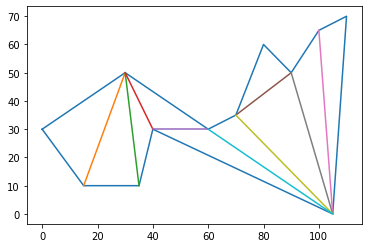

In [8]:
wielokat = [(0, 30), (30, 50), (60, 30), (70, 35), (80, 60), (90, 50), (100, 65), (110, 70), (105, 0), (40, 30), (35, 10), (15, 10)]
wykonaj(wielokat)

stos: [[(0, 10), -1], [(0, 20), 1]]
wierzcholek:  (10, 0)
dodaję:  ((10, 0), (0, 20))

stos: [[(0, 20), 1], [(10, 0), -1]]
wierzcholek:  (10, 30)
dodaję:  ((10, 30), (10, 0))

stos: [[(10, 0), -1], [(10, 30), 1]]
wierzcholek:  (20, 10)
dodaję:  ((20, 10), (10, 30))

stos: [[(10, 30), 1], [(20, 10), -1]]
wierzcholek:  (20, 10) - ostatni
[((10, 0), (0, 20)), ((10, 30), (10, 0)), ((20, 10), (10, 30))]


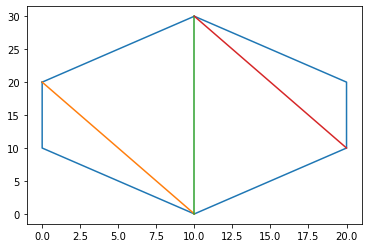

In [9]:
wielokat2 = [(0,20), (10,30), (20,20), (20,10), (10,0), (0,10)]
wykonaj(wielokat2)

stos: [[(0, 0), 1], [(0, 1), 1]]
wierzcholek:  (1, 0)
dodaję:  ((1, 0), (0, 1))

stos: [[(0, 1), 1], [(1, 0), -1]]
wierzcholek:  (1, 0) - ostatni
[((1, 0), (0, 1))]


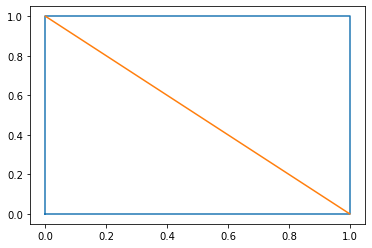

In [10]:
wielokat5 = [(0,0), (0,1), (1,1), (1,0)]
wykonaj(wielokat5)

stos: [[(0, 0), 1], [(0, 20), 1]]
wierzcholek:  (10, 10)
dodaję:  ((10, 10), (0, 0))

stos: [[(0, 0), 1], [(10, 10), 1]]
wierzcholek:  (10, 10) - ostatni
[((10, 10), (0, 0))]


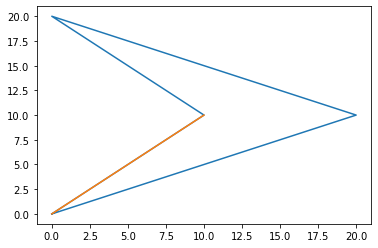

In [11]:
wielokat3 = [(0,0), (10, 10), (0,20), (20,10)]
wykonaj(wielokat3)

stos: [[(0, 0), 1], [(10, 10), -1]]
wierzcholek:  (10, 20)
dodaję:  ((10, 20), (10, 10))

stos: [[(10, 10), -1], [(10, 20), 1]]
wierzcholek:  (10, 20) - ostatni
[((10, 20), (10, 10))]


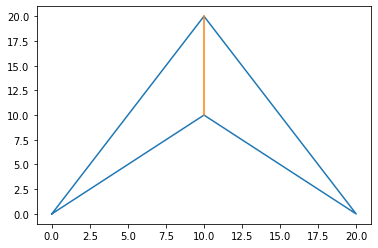

In [12]:
wielokat4 = [(0,0), (10, 20), (20,0), (10,10)]
wykonaj(wielokat4)